<a href="https://colab.research.google.com/github/SeongwonTak/TIL_swtak/blob/master/DLBasic/IntroDLwithPytorch06_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망(Artificial Neural Network)

## 초기 인공신경망, 퍼셉트론
퍼셉트론의 경우는 초기 형태의 인공신경말 모델로 다수의 입력에서 나온 결과가 특정 값 이상일 경우 1의 출력값을, 아닐 경우 0을 출력한다.

이 특정값을 임계치라고 한다. (임계치를 좌변으로 넘겨 편항으로 표현 가능)  
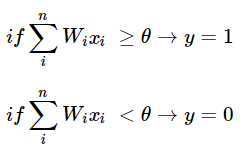

### 단층 퍼셉트론의 구현

In [ ]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [ ]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

AND, NAND, OR은 쉽게 구현이 가능하나 XOR은 그렇지가 않다. 그 이유는 직선 하나로 두 영역을 나눌 수 없는 문제이기 때문이다. 선으로는 나눌 수 없고, 곡선일때만 가능하기에, 선으로 분리하는 단층 퍼셉트론으로는 XOR 문제를 해결할 수 없다

### 다층 퍼셉트론으로 XOR 구현하기

하지만, 다층 퍼셉트론의 경우에는 XOR 게이트의 구현이 가능하다.

In [ ]:
def XOR_gate(x1, x2):
  s1 = NAND_gate(x1, x2)
  s2 = OR_gate(x1, x2)
  y = AND_gate(s1, s2)
  return y

이렇게 층을 쌓아서 우리가 원하는 모델을 만들 수 있는 것이, 가장 기본적인 퍼셉트론 모델이다.

## 순전파와 역전파

### 역전파를 통한 XOR문제 구현

In [ ]:
import torch
import torch.nn as nn

In [ ]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [ ]:
# 3개의 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
          )

In [ ]:
criterion = torch.nn.BCELoss() # 이진분류에서 사용하는 cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=1) 

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X)

    # 비용 함수
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    # 100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6943894028663635
100 0.6931676864624023
200 0.6931647062301636
300 0.6931619644165039
400 0.693159282207489
500 0.6931567192077637
600 0.6931542754173279
700 0.6931518316268921
800 0.6931494474411011
900 0.6931470632553101
1000 0.693144679069519
1100 0.6931422352790833
1200 0.6931397914886475
1300 0.6931374073028564
1400 0.6931347846984863
1500 0.6931320428848267
1600 0.6931291818618774
1700 0.6931262612342834
1800 0.6931230425834656
1900 0.6931195259094238
2000 0.6931158900260925
2100 0.693111777305603
2200 0.6931073069572449
2300 0.6931023001670837
2400 0.6930967569351196
2500 0.6930906176567078
2600 0.6930835843086243
2700 0.6930755376815796
2800 0.6930663585662842
2900 0.6930555701255798
3000 0.6930431127548218
3100 0.6930282711982727
3200 0.6930104494094849
3300 0.692988932132721
3400 0.6929623484611511
3500 0.692929208278656
3600 0.6928867697715759
3700 0.6928315162658691
3800 0.6927576065063477
3900 0.6926552057266235
4000 0.6925076246261597
4100 0.6922839879989624
4200 0.69

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.03005324e-04]
 [9.99875903e-01]
 [9.99862194e-01]
 [1.57592018e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 비선형 활성화 함수

선형함수로는 은닉층을 추가해도 합성함수 형태는  선형이므로 의미가 없다.
따라서, 비선형함수로 활성화 함수를 써야한다.

### Sigmoid

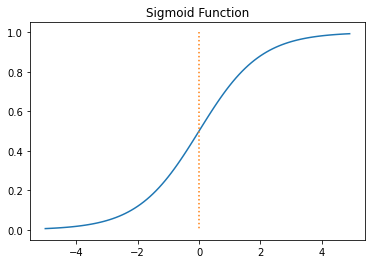

In [3]:
# 시그모이드 함수 그래프를 그리는 코드
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

###ReLU
양수면 입력값을 그대로, 음수면 0을 돌려주는 함수이다.
음수로 간 값은 다시 회생하기가 매우 어렵다는 문제가 있다.


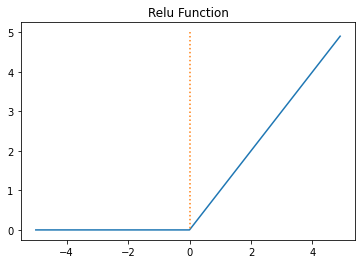

In [4]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### Softmax

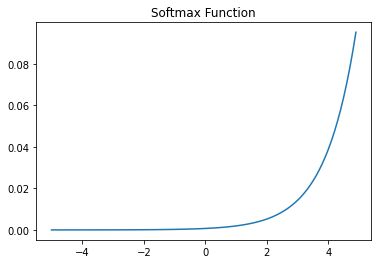

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()